In [3]:
#1. Data Ingestion
import pandas as pd

# Load datasets
csv_df = pd.read_csv("etrm_trades.csv")
json_df = pd.read_json("etrm_trades.json")
excel_df = pd.read_excel("etrm_trades.xlsx")
txt_df = pd.read_csv("etrm_trades.txt", delimiter="|")
html_df = pd.read_html("etrm_trades.html")[0]
xml_df = pd.read_xml("etrm_trades.xml")

# Store in dictionary for easy iteration
dataframes = {
    "CSV": csv_df,
    "JSON": json_df,
    "Excel": excel_df,
    "TXT": txt_df,
    "HTML": html_df,
    "XML": xml_df
}

# Display shape of each dataset
for name, df in dataframes.items():
    print(f"{name} shape:", df.shape)
    display(df.head())


CSV shape: (100, 9)


,TradeID,Commodity,TradeType,Volume,Price,Currency,DeliveryStart,DeliveryEnd,Periodicity
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly


JSON shape: (100, 9)


,TradeID,Commodity,TradeType,Volume,Price,Currency,DeliveryStart,DeliveryEnd,Periodicity
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly


Excel shape: (100, 9)


,TradeID,Commodity,TradeType,Volume,Price,Currency,DeliveryStart,DeliveryEnd,Periodicity
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly


TXT shape: (100, 9)


,TradeID,Commodity,TradeType,Volume,Price,Currency,DeliveryStart,DeliveryEnd,Periodicity
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly


HTML shape: (100, 9)


,TradeID,Commodity,TradeType,Volume,Price,Currency,DeliveryStart,DeliveryEnd,Periodicity
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly


XML shape: (100, 9)


,TradeID,Commodity,TradeType,Volume,Price,Currency,DeliveryStart,DeliveryEnd,Periodicity
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly


In [4]:
#2.Ensure Consistency (Column Names)
# Compare column names
columns_table = pd.DataFrame({name: df.columns for name, df in dataframes.items()})
display(columns_table.style.set_caption("Column Names Across All Data Formats"))

,CSV,JSON,Excel,TXT,HTML,XML
0,TradeID,TradeID,TradeID,TradeID,TradeID,TradeID
1,Commodity,Commodity,Commodity,Commodity,Commodity,Commodity
2,TradeType,TradeType,TradeType,TradeType,TradeType,TradeType
3,Volume,Volume,Volume,Volume,Volume,Volume
4,Price,Price,Price,Price,Price,Price
5,Currency,Currency,Currency,Currency,Currency,Currency
6,DeliveryStart,DeliveryStart,DeliveryStart,DeliveryStart,DeliveryStart,DeliveryStart
7,DeliveryEnd,DeliveryEnd,DeliveryEnd,DeliveryEnd,DeliveryEnd,DeliveryEnd
8,Periodicity,Periodicity,Periodicity,Periodicity,Periodicity,Periodicity


In [5]:
#2.Ensure Consistency (Dtypes)
# Compare data types
dtypes_table = pd.DataFrame({name: df.dtypes for name, df in dataframes.items()})
display(dtypes_table.style.set_caption("Data Types Across All Data Formats"))

,CSV,JSON,Excel,TXT,HTML,XML
TradeID,int64,int64,int64,int64,int64,int64
Commodity,object,object,object,object,object,object
TradeType,object,object,object,object,object,object
Volume,float64,float64,float64,float64,float64,float64
Price,float64,float64,float64,float64,float64,float64
Currency,object,object,object,object,object,object
DeliveryStart,object,object,object,object,object,object
DeliveryEnd,object,object,object,object,object,object
Periodicity,object,object,object,object,object,object


In [6]:
#2.Data Cleaning & Transformation
#a.Convert date columns to datetime
for name, df in dataframes.items():
    df["DeliveryStart"] = pd.to_datetime(df["DeliveryStart"], errors="coerce")
    df["DeliveryEnd"] = pd.to_datetime(df["DeliveryEnd"], errors="coerce")

# Combine into one master DataFrame
master_df = pd.concat(dataframes.values(), ignore_index=True)

# Display cleaned dataset info
display(master_df.head())
display(master_df.info())


,TradeID,Commodity,TradeType,Volume,Price,Currency,DeliveryStart,DeliveryEnd,Periodicity
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TradeID        600 non-null    int64         
 1   Commodity      600 non-null    object        
 2   TradeType      600 non-null    object        
 3   Volume         600 non-null    float64       
 4   Price          600 non-null    float64       
 5   Currency       600 non-null    object        
 6   DeliveryStart  600 non-null    datetime64[ns]
 7   DeliveryEnd    600 non-null    datetime64[ns]
 8   Periodicity    600 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 42.3+ KB


None

In [7]:
#3.Exploratory Data Analysis(EDA)
#a.Average price per commodity
avg_price = master_df.groupby("Commodity")["Price"].mean().reset_index()
display(avg_price)

,Commodity,Price
0,Coal,104.642941
1,Gas,119.778437
2,Oil,101.757826
3,Power,100.469643


In [8]:
#b.Distribution of trades by currency
currency_dist = master_df["Currency"].value_counts().reset_index()
currency_dist.columns = ["Currency", "Count"]
display(currency_dist)

,Currency,Count
0,GBP,228
1,USD,204
2,EUR,168


In [9]:
#c.Trade periodicity breakdown
periodicity_dist = master_df["Periodicity"].value_counts().reset_index()
periodicity_dist.columns = ["Periodicity", "Count"]
display(periodicity_dist)

,Periodicity,Count
0,Daily,246
1,Quarterly,186
2,Monthly,168


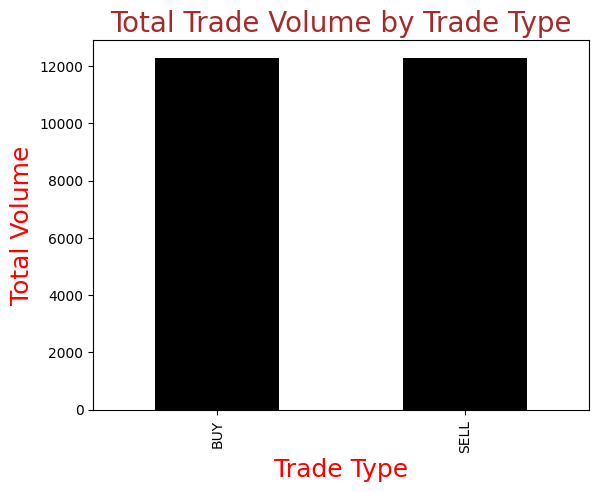

In [24]:
import matplotlib.pyplot as plt

volume_by_trade_type = csv_df.groupby('TradeType')['Volume'].sum().sort_values(ascending=False)
volume_by_trade_type.plot(kind='bar', color='black')
plt.title('Total Trade Volume by Trade Type',color="brown",size=20)
plt.xlabel('Trade Type',color="red",size=18)
plt.ylabel('Total Volume',color="red",size=18)
plt.show()


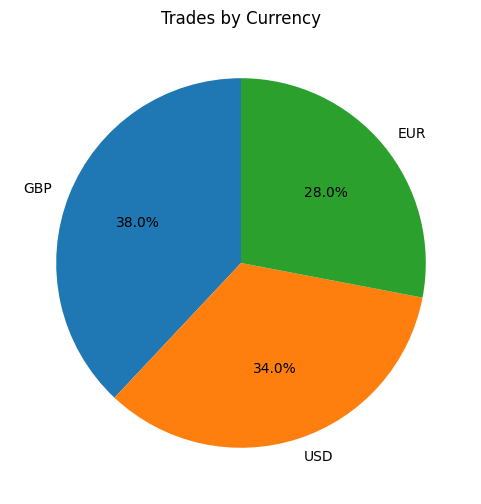

In [10]:
#5.Data Visualization
#a.Pie chart: Trades by currency

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(currency_dist["Count"], labels=currency_dist["Currency"], autopct="%1.1f%%", startangle=90)
plt.title("Trades by Currency")
plt.show()

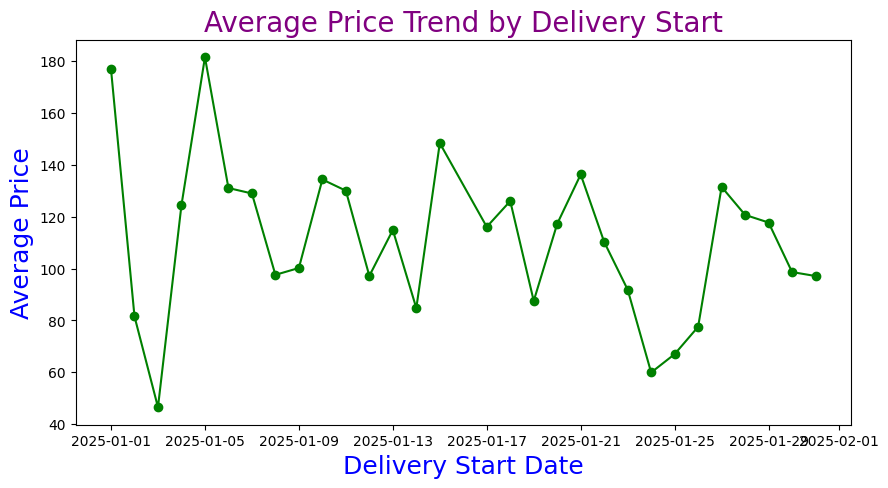

In [11]:
#b.Line chart: Average price trend by DeliveryStart
price_trend = master_df.groupby("DeliveryStart")["Price"].mean().reset_index()
plt.figure(figsize=(10,5))
plt.plot(price_trend["DeliveryStart"], price_trend["Price"], marker="o", color="green")
plt.title("Average Price Trend by Delivery Start",size=20,color="purple")
plt.xlabel("Delivery Start Date",color="blue",size=18)
plt.ylabel("Average Price",color="blue",size=18)
plt.show()


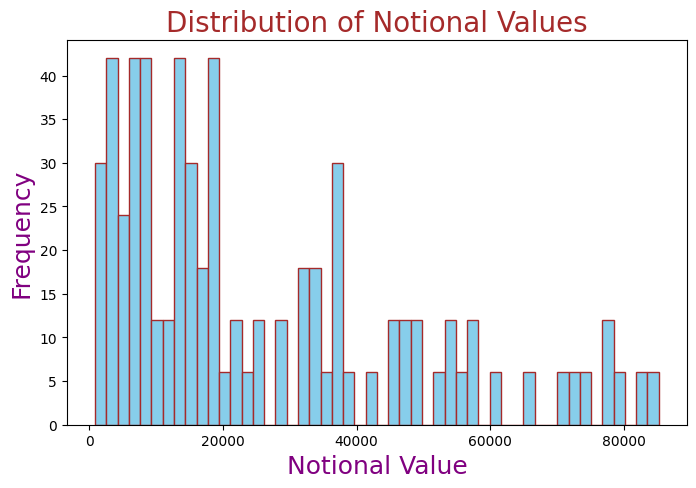

In [12]:
#c.Histogram: Distribution of Notional Values (Price * Volume)
master_df["Notional"] = master_df["Price"] * master_df["Volume"]
plt.figure(figsize=(8,5))
plt.hist(master_df["Notional"], bins=50, color="skyblue", edgecolor="brown")
plt.title("Distribution of Notional Values",size=20,color="brown")
plt.xlabel("Notional Value",color="purple",size=18)
plt.ylabel("Frequency",color="purple",size=18)
plt.show()

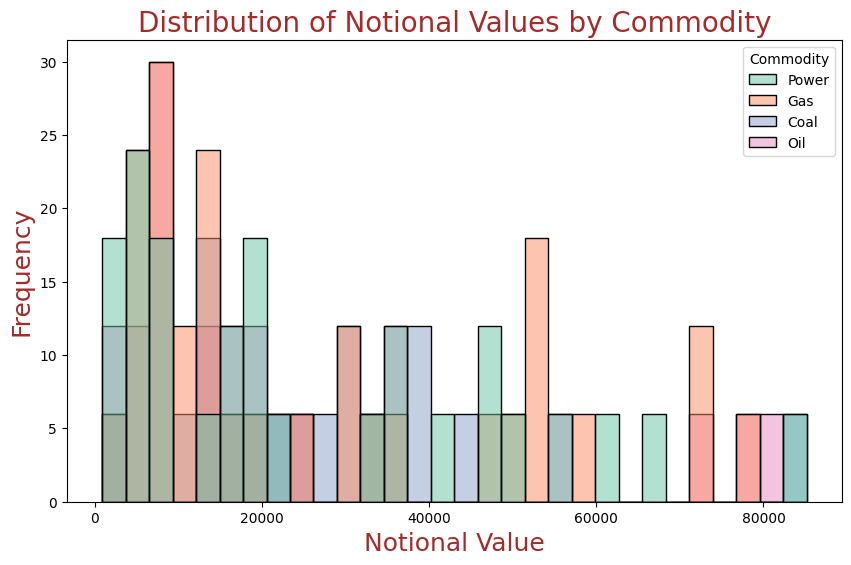

In [13]:
#c.Histogram: Distribution of Notional Values (Price * Volume)
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(data=master_df, x="Notional", hue="Commodity", bins=30, kde=False, palette="Set2")
plt.title("Distribution of Notional Values by Commodity",size=20,color="brown")
plt.xlabel("Notional Value",color="brown",size=18)
plt.ylabel("Frequency",color="brown",size=18)
plt.show()


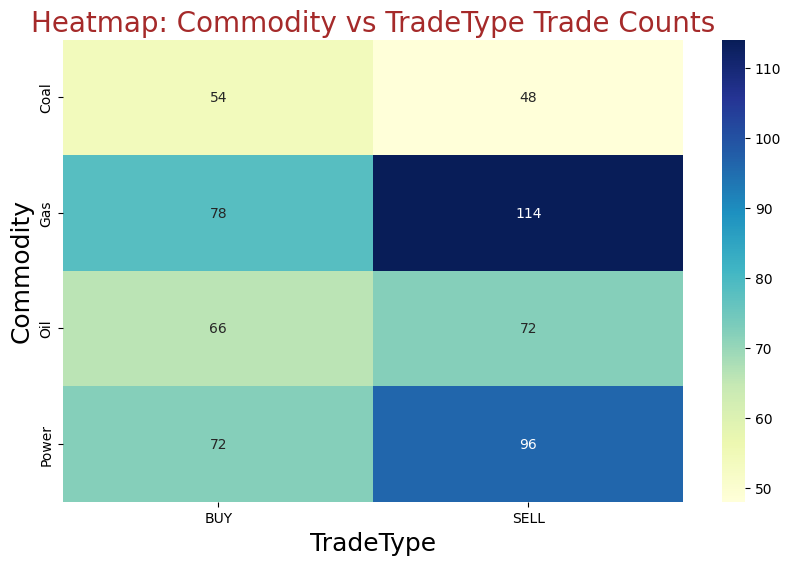

In [14]:
#d.Heatmap: Commodity vs TradeType (trade counts)
pivot_table = master_df.pivot_table(
    index="Commodity",
    columns="TradeType",
    values="TradeID",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap: Commodity vs TradeType Trade Counts",size=20,color="brown")
plt.xlabel("TradeType",size=18)
plt.ylabel("Commodity",size=18)
plt.show()
